<a href="https://colab.research.google.com/github/chavi55/AI/blob/main/9weeks_titatic_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense

In [ ]:
titanic = pd.read_excel('/gdrive/MyDrive/인공지능/titanic.xls')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [ ]:
titanic.isna().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

In [ ]:
#결측치 처리하기
# age : 평균값
titanic.age.fillna(value=titanic.age.mean(), inplace = True)
# fare : 삭제하기
titanic = titanic[titanic['fare'].notnull()]

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1308 non-null   int64  
 1   survived  1308 non-null   int64  
 2   name      1308 non-null   object 
 3   sex       1308 non-null   object 
 4   age       1308 non-null   float64
 5   sibsp     1308 non-null   int64  
 6   parch     1308 non-null   int64  
 7   ticket    1308 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1306 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.6+ KB


In [ ]:
#sex : 숫자로 변경
titanic.sex = titanic.sex.map({'male':0, 'female':1})
titanic.sex

0       1
1       0
2       1
3       0
4       1
       ..
1304    1
1305    1
1306    0
1307    0
1308    0
Name: sex, Length: 1308, dtype: int64

In [ ]:
#정수 데이터를 실수형으로 변경
titanic['survived'] = titanic['survived'].astype('float')
titanic['pclass'] = titanic['pclass'].astype('float')
titanic['sex'] = titanic['sex'].astype('float')
titanic['sibsp'] = titanic['sibsp'].astype('float')
titanic['parch'] = titanic['parch'].astype('float')

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1308 non-null   float64
 1   survived  1308 non-null   float64
 2   name      1308 non-null   object 
 3   sex       1308 non-null   float64
 4   age       1308 non-null   float64
 5   sibsp     1308 non-null   float64
 6   parch     1308 non-null   float64
 7   ticket    1308 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1306 non-null   object 
dtypes: float64(7), object(4)
memory usage: 122.6+ KB


In [ ]:
# 데이터세트 생성
x_data = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y_data = titanic['survived']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size = 0.1, random_state=7)
x_train.shape, x_test.shape, y_train.shape, y_train.shape

((1177, 6), (131, 6), (1177,), (1177,))

In [ ]:
#모델 구성하기
model = Sequential()
model.add(Dense(128, input_shape=(6, ), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#학습 과정 설정하기
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
h=model.fit(x_train, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
30/30 [==============================] - 1s 7ms/step - loss: 0.4062 - accuracy: 0.5760 - val_loss: 0.3885 - val_accuracy: 0.6102
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.3699 - accuracy: 0.6238 - val_loss: 0.3281 - val_accuracy: 0.6102
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.2886 - accuracy: 0.6366 - val_loss: 0.2513 - val_accuracy: 0.6822
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.2413 - accuracy: 0.6461 - val_loss: 0.2177 - val_accuracy: 0.7034
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 0.7131 - val_loss: 0.1805 - val_accuracy: 0.7500
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.1931 - accuracy: 0.7131 - val_loss: 0.1727 - val_accuracy: 0.7712
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.1915 - accuracy: 0.7109 - val_loss: 0.1628 - val_accuracy: 0.7627
Epoch 8/100
3

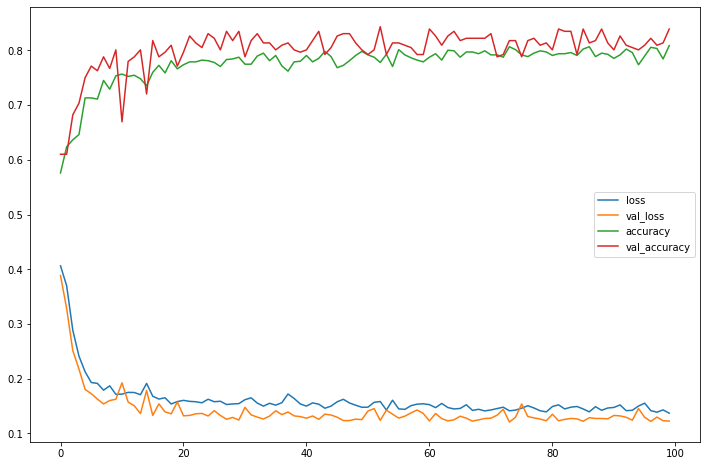

In [ ]:
# 그래프
plt.figure(figsize=(12, 8))
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.show()

In [ ]:
#모델 평가하기
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss={:.2f}'.format(loss))
print('Accuracy={:.2f}'.format(accuracy))

5/5 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.8244
Loss=0.14
Accuracy=0.82


In [ ]:
w = np.array([1., 1., 17., 1., 2., 100.]).reshape(1, 6)
model.predict(w)

array([[0.9856576]], dtype=float32)